In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Airlines passengers data
data = pd.read_excel("Airlines+Data.xlsx")

In [3]:
print(data.isnull().sum())
print()
print(data.describe())

Month         0
Passengers    0
dtype: int64

                     Month  Passengers
count                   96   96.000000
mean   1998-12-16 05:00:00  213.708333
min    1995-01-01 00:00:00  104.000000
25%    1996-12-24 06:00:00  156.000000
50%    1998-12-16 12:00:00  200.000000
75%    2000-12-08 18:00:00  264.750000
max    2002-12-01 00:00:00  413.000000
std                    NaN   71.918216


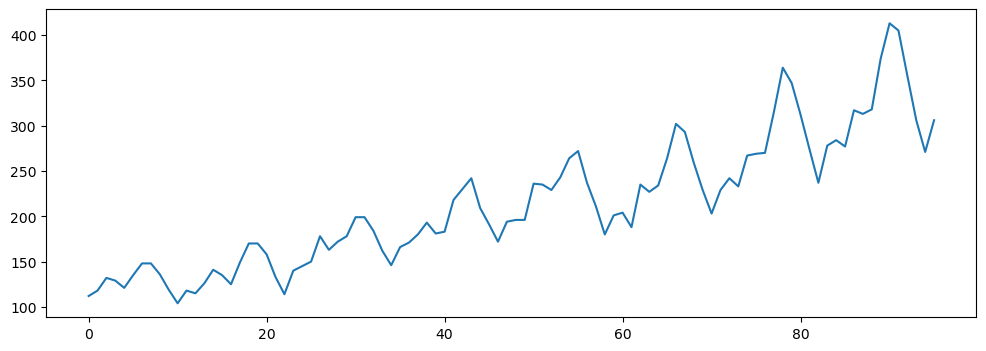

In [4]:
data.Passengers.plot(figsize=(12,4));

In [5]:
print('Shape of the data', data.shape)

Shape of the data (96, 2)


In [6]:
data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
data.nunique()

Month         96
Passengers    80
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [9]:
data.describe()

,Month,Passengers
count,96,96.000000
mean,1998-12-16 05:00:00,213.708333
min,1995-01-01 00:00:00,104.000000
25%,1996-12-24 06:00:00,156.000000
50%,1998-12-16 12:00:00,200.000000
75%,2000-12-08 18:00:00,264.750000
max,2002-12-01 00:00:00,413.000000
std,NaN,71.918216


# Feature Engineering

In [10]:
data.rename({'Month':'Date'}, axis=1, inplace=True)

In [11]:
# Making the Date as DateTime index for the Dataframe

airline_data = data.copy()
airline_data.set_index('Date', inplace=True)
airline_data.index.year

Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
       1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
       1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
       1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
       1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001,
       2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
      dtype='int32', name='Date')

In [12]:
airline_data.head()

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [13]:
# Separating Month and Year into Separate Columns

data["Date"]  = pd.to_datetime(data.Date, format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"]  = data.Date.dt.strftime("%Y") # year extraction
data.head(10)

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


# Data Visualization

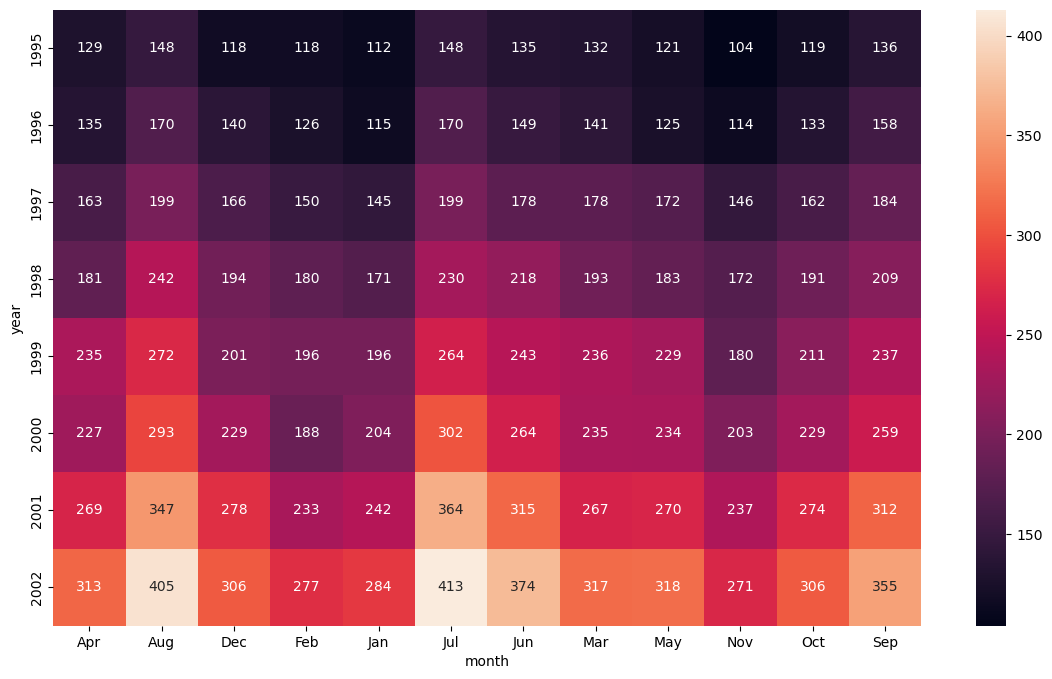

In [14]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

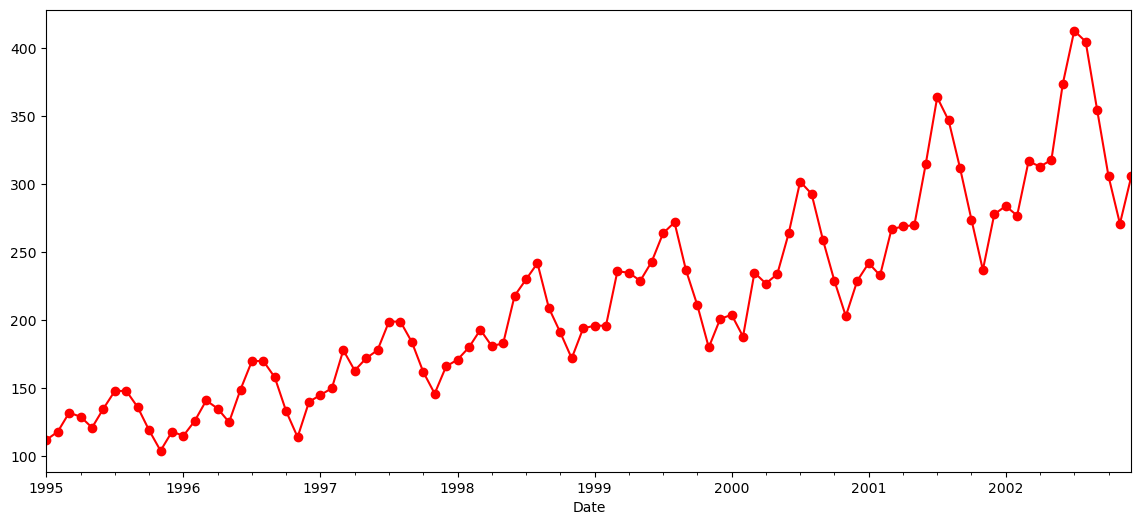

In [15]:
airline_data['Passengers'].plot(figsize=(14,6),color='red',marker='o')
plt.show()

<Axes: xlabel='year', ylabel='Passengers'>

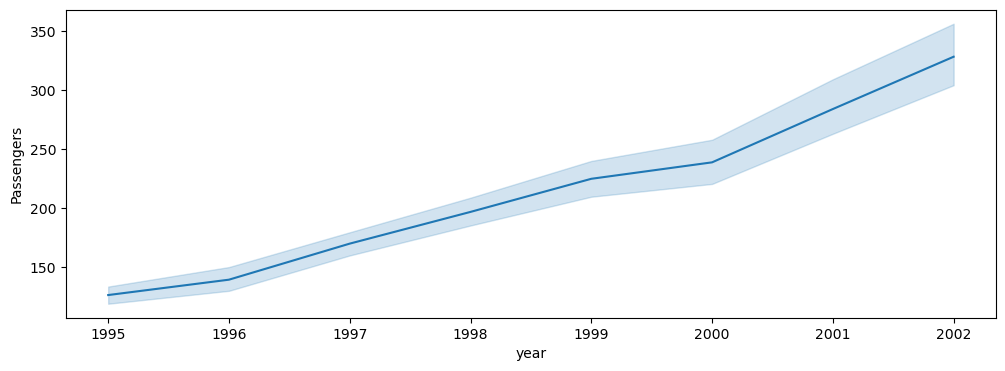

In [16]:
# Yearly passenger analysis

plt.figure(figsize=(12,4))
sns.lineplot(x="year", y="Passengers", data=data)

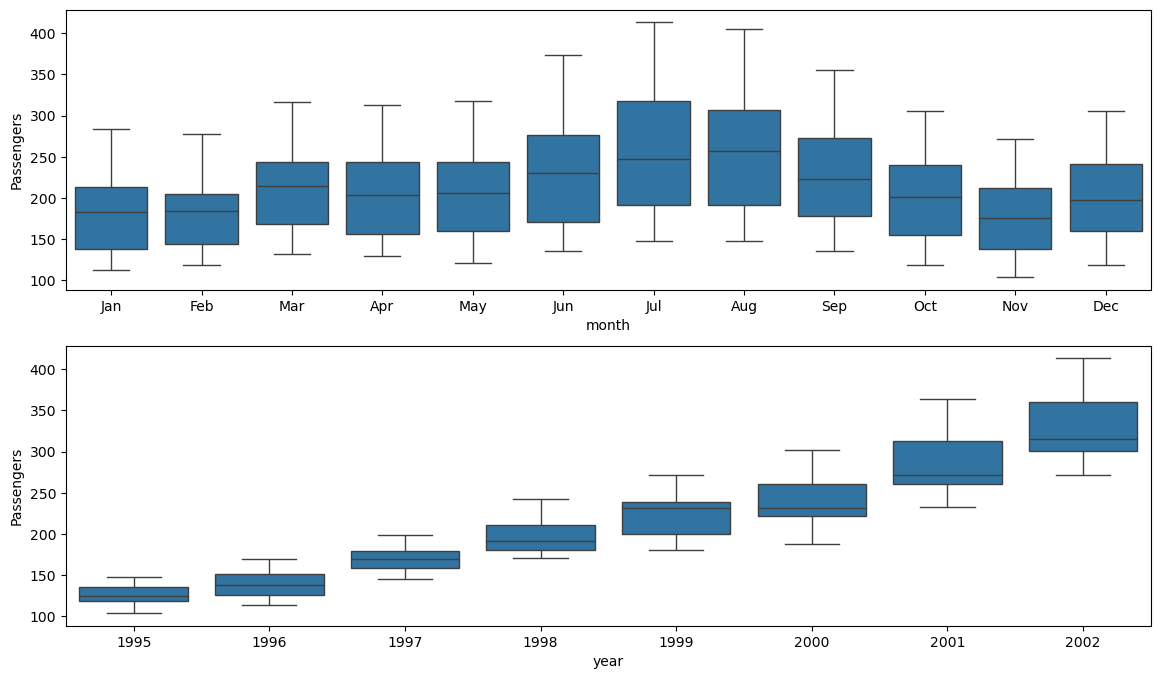

In [17]:
# Box Plot of Each Year by Monthly Intervals

plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month", y="Passengers", data=data)
plt.subplot(212)
sns.boxplot(x="year", y="Passengers", data=data)
plt.show()

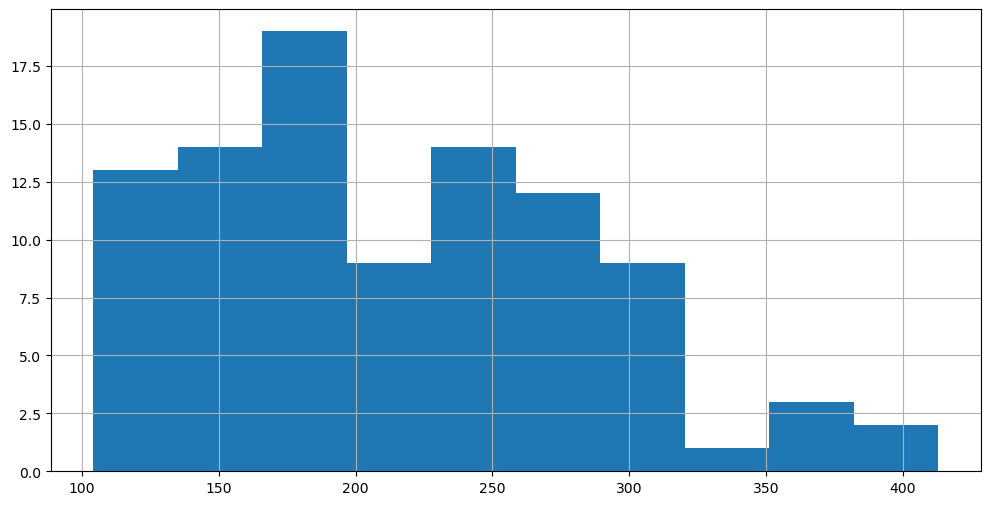

In [18]:
# Histogram and Density Plots

data.Passengers.hist(figsize=(12,6))
plt.show()

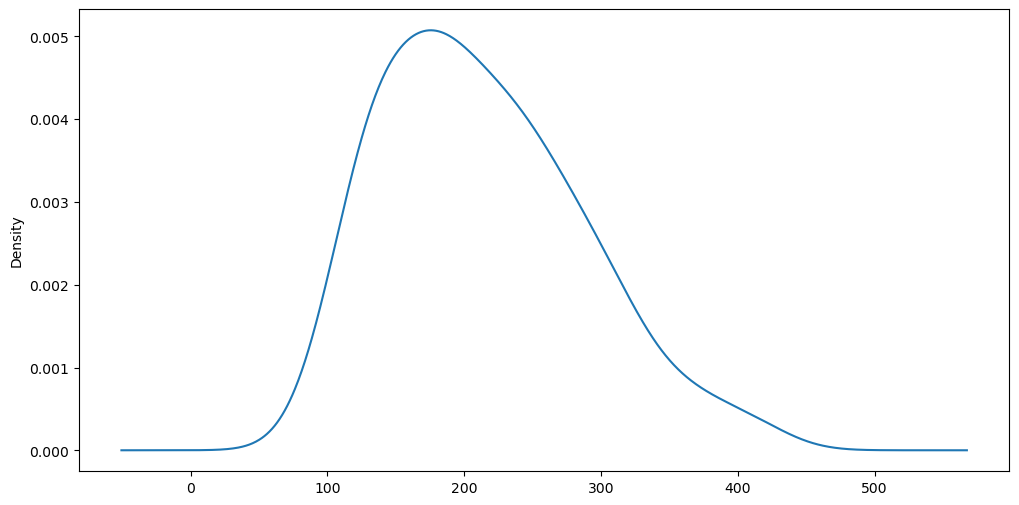

In [19]:
data.Passengers.plot(kind='kde', figsize=(12,6))
plt.show()

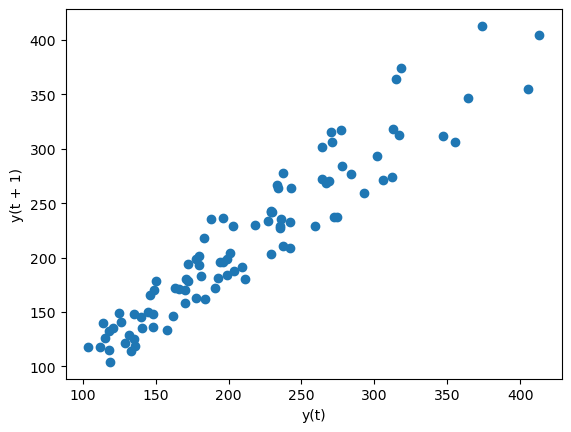

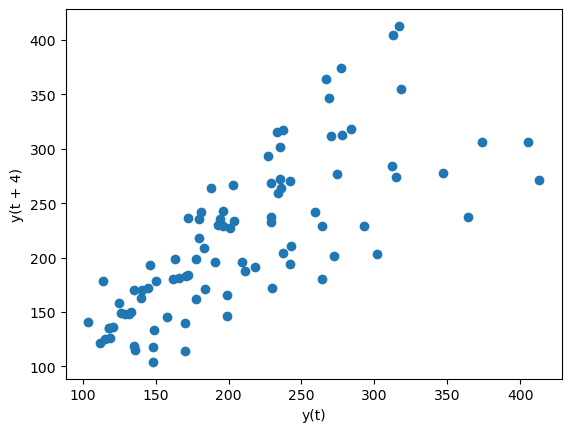

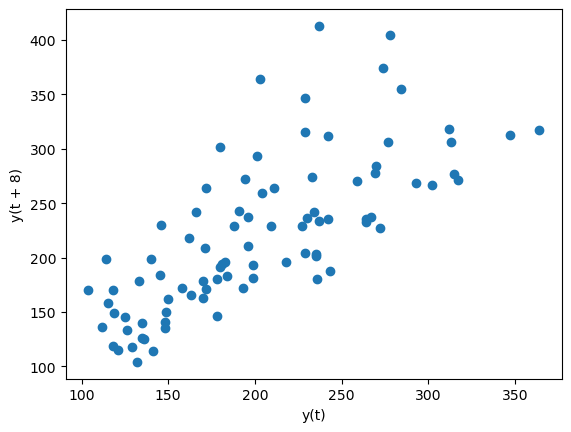

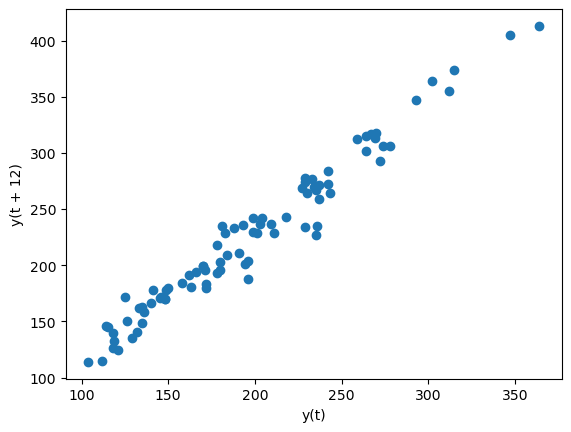

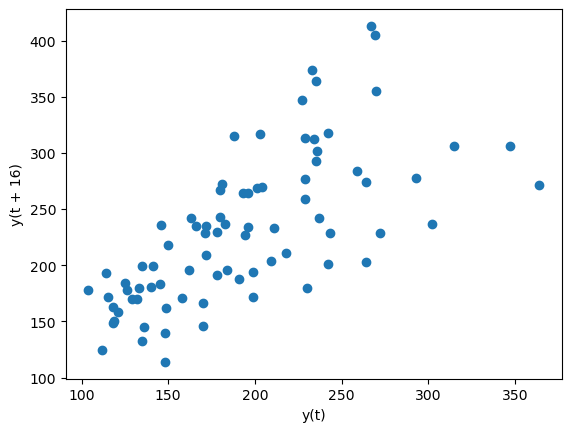

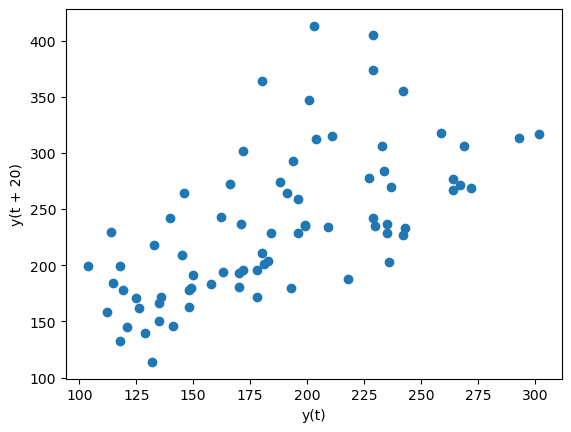

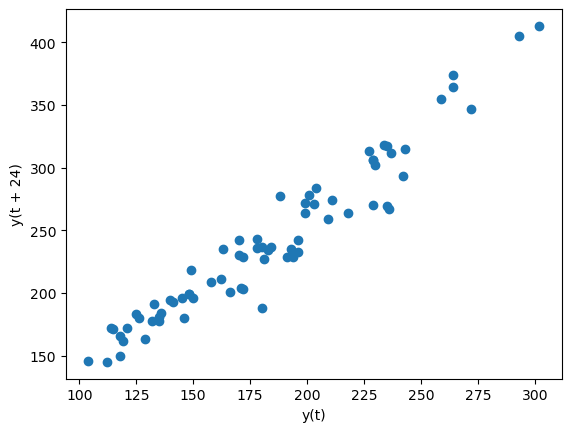

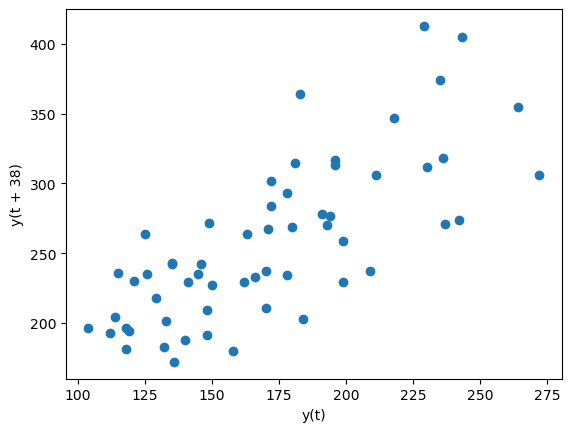

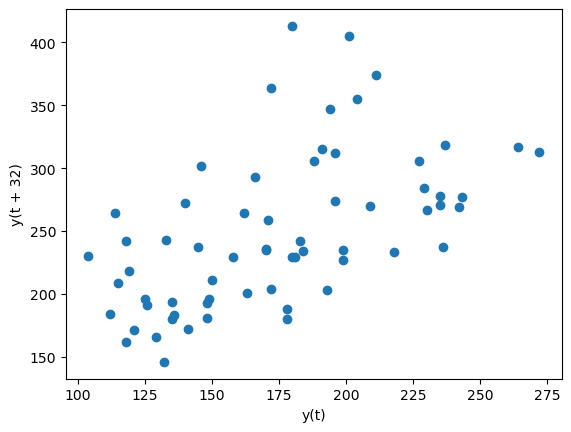

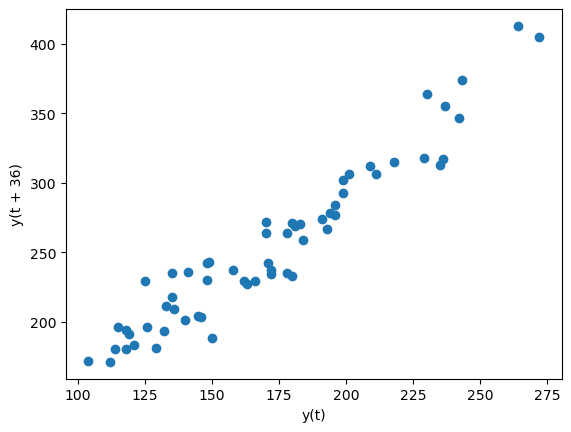

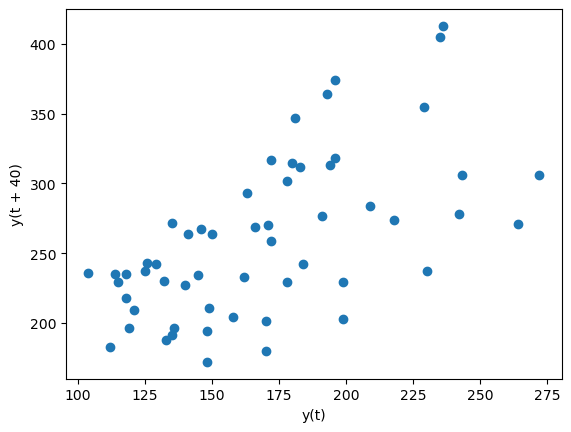

In [20]:
# Lag plot

# create a scatter plot
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    lag_plot(data.Passengers, lag=i)
    plt.show()

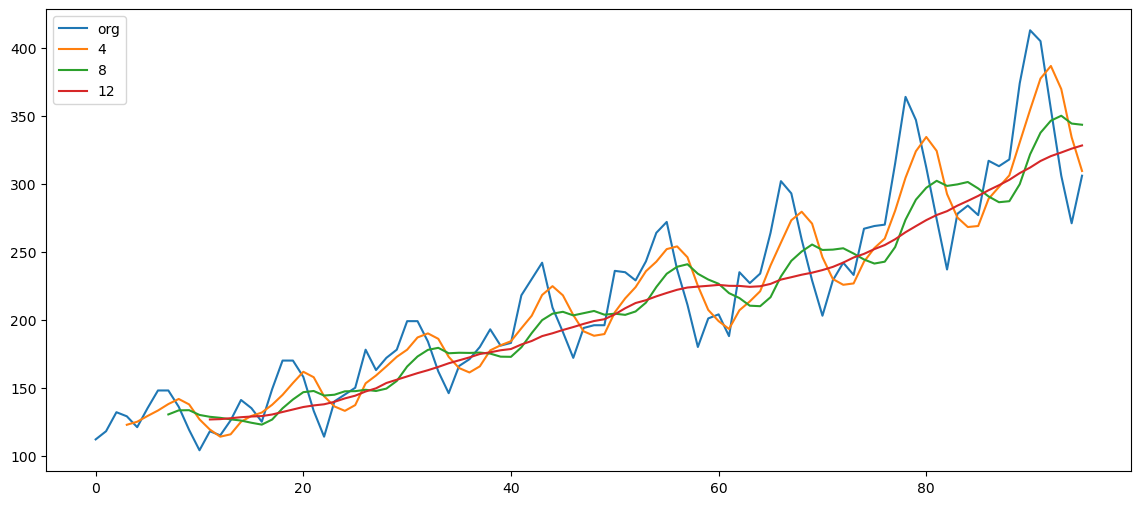

In [21]:
# Moving average

plt.figure(figsize=(14,6))
data.Passengers.plot(label="org")
for i in range(4,13,4):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

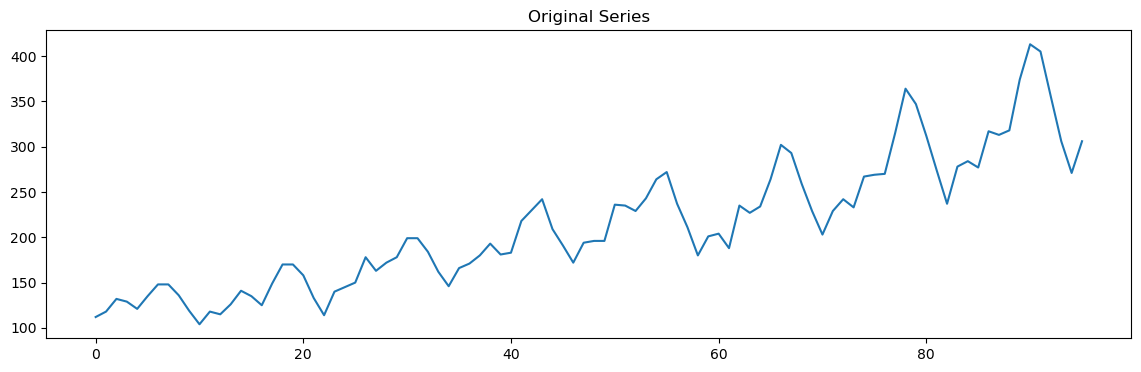

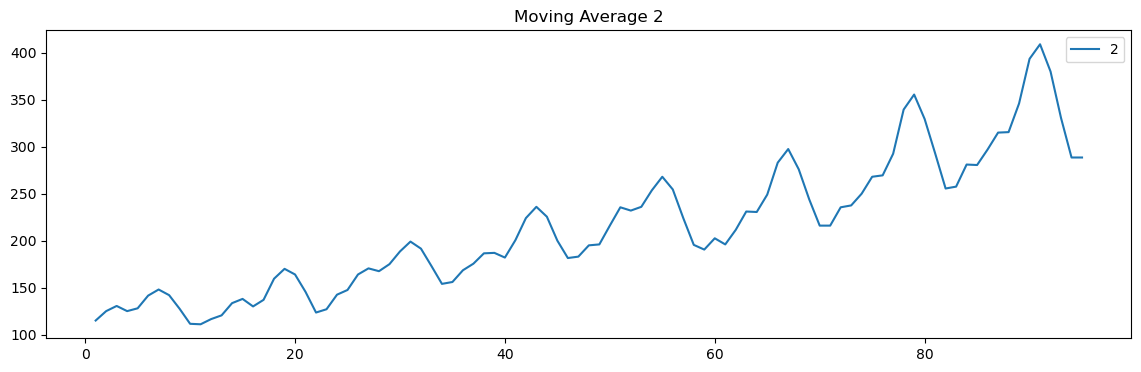

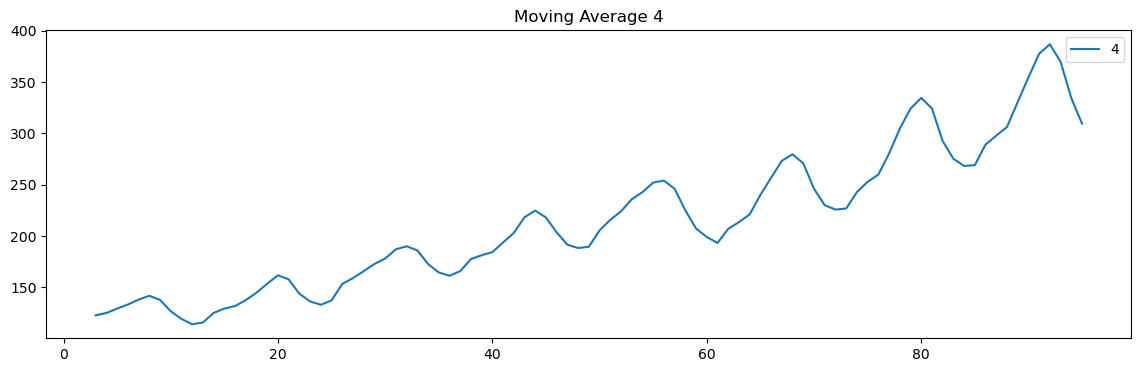

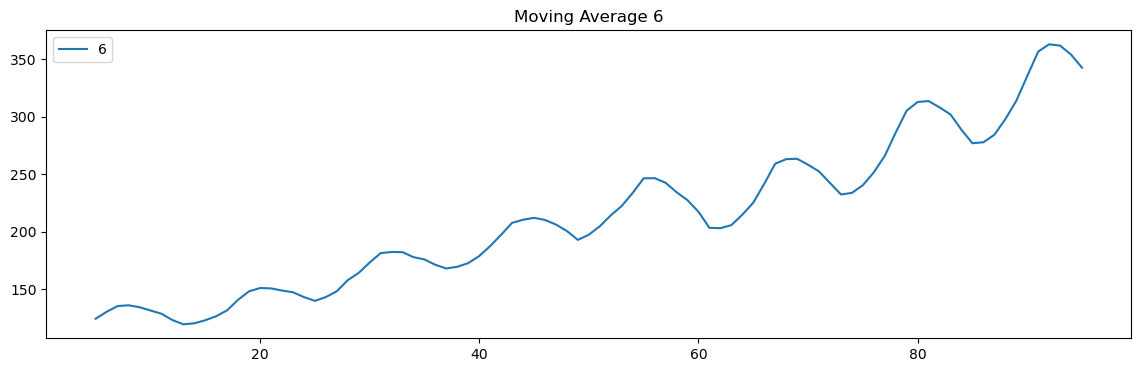

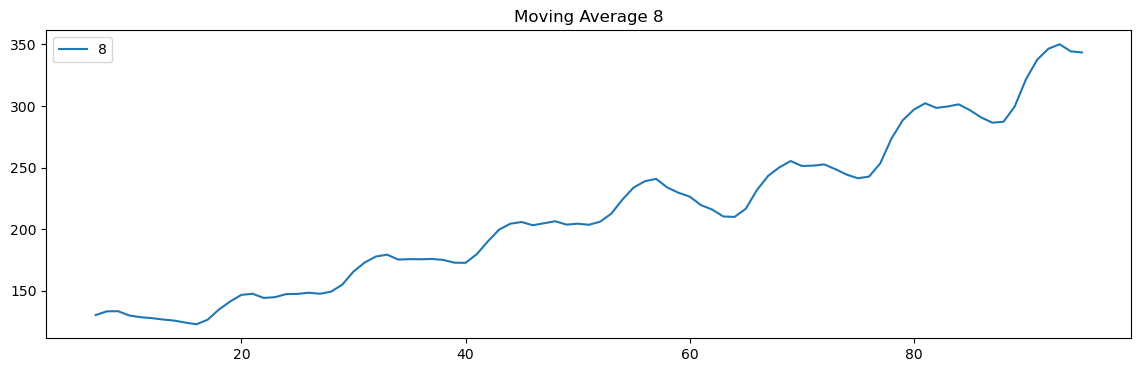

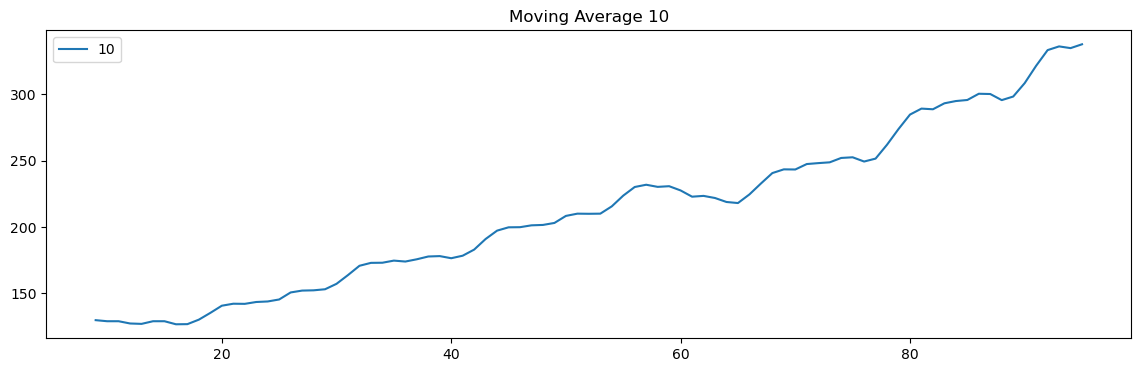

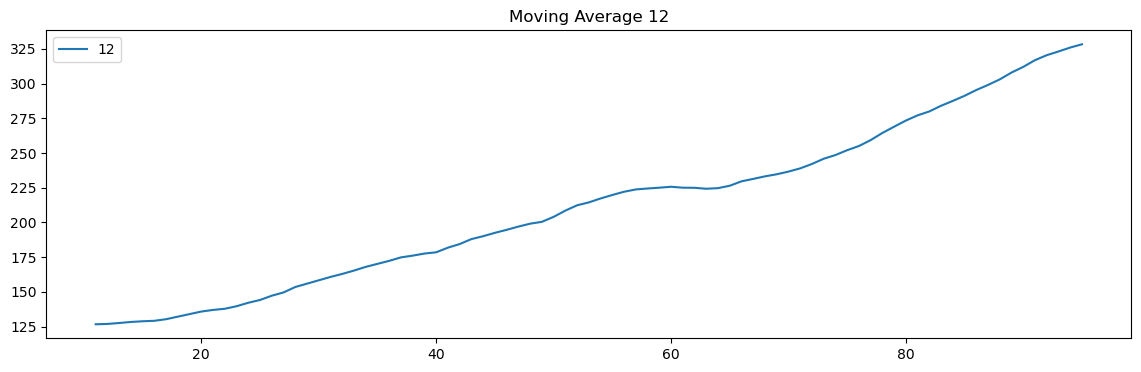

In [22]:
plt.figure(figsize=(14,4))
data.Passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,13,2):
    plt.figure(figsize=(14,4))
    data["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

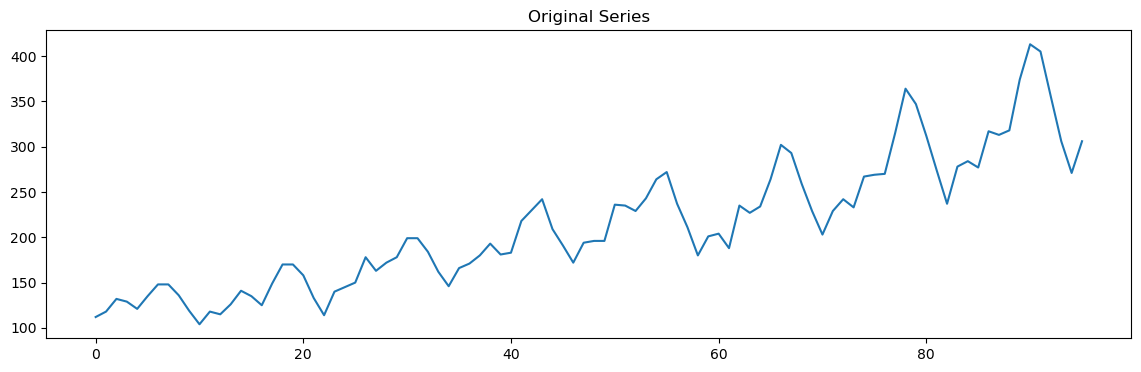

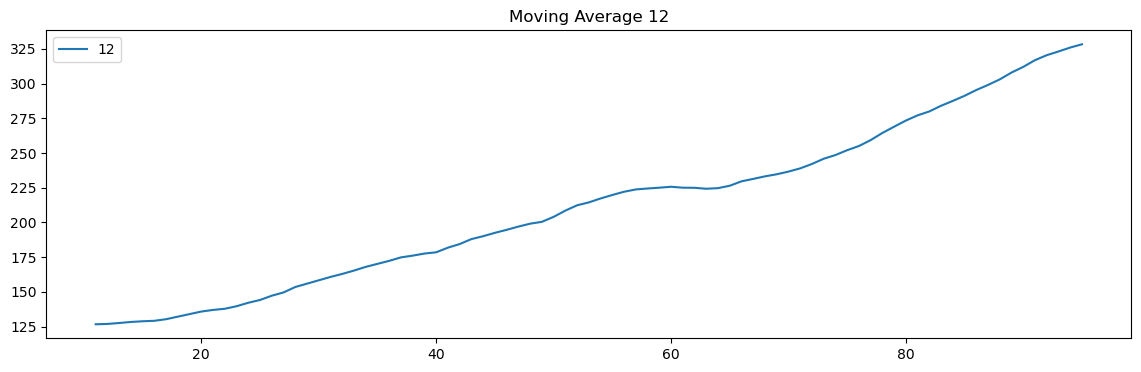

In [23]:
plt.figure(figsize=(14,4))
data.Passengers.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(14,4))
data["Passengers"].rolling(12).mean().plot(label=str(12))
plt.title("Moving Average "+str(12))
plt.legend(loc='best')
plt.show()

In [24]:
data.head()

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [25]:
# Create dummy variables for months
dummy_months = pd.get_dummies(data['month'], prefix='Month')

# Concatenate dummy variables with the original dataframe
data = pd.concat([data, dummy_months], axis=1)

In [26]:
data.head()

,Date,Passengers,month,year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,1995-01-01,112,Jan,1995,False,False,False,False,True,False,False,False,False,False,False,False
1,1995-02-01,118,Feb,1995,False,False,False,True,False,False,False,False,False,False,False,False
2,1995-03-01,132,Mar,1995,False,False,False,False,False,False,False,True,False,False,False,False
3,1995-04-01,129,Apr,1995,True,False,False,False,False,False,False,False,False,False,False,False
4,1995-05-01,121,May,1995,False,False,False,False,False,False,False,False,True,False,False,False


In [27]:
# Features and target variable
X = data.drop(['Date', 'month', 'Passengers'], axis=1)
y = data['Passengers']

In [28]:
print(X.head())
print(y.head())

   year  Month_Apr  Month_Aug  Month_Dec  Month_Feb  Month_Jan  Month_Jul  \
0  1995      False      False      False      False       True      False   
1  1995      False      False      False       True      False      False   
2  1995      False      False      False      False      False      False   
3  1995       True      False      False      False      False      False   
4  1995      False      False      False      False      False      False   

   Month_Jun  Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  
0      False      False      False      False      False      False  
1      False      False      False      False      False      False  
2      False       True      False      False      False      False  
3      False      False      False      False      False      False  
4      False      False       True      False      False      False  
0    112
1    118
2    132
3    129
4    121
Name: Passengers, dtype: int64


In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "ARIMA": ARIMA(y, order=(5,1,0)),
    "Support Vector Regression": SVR()
}

predictions = {}
for name, model in models.items():
    if name == "ARIMA":
        # Fit ARIMA model
        model_fit = model.fit()
        # Make in-sample predictions
        predictions[name] = model_fit.predict()
    else:
        # Fit other models
        model.fit(X, y)
        # Make predictions
        predictions[name] = model.predict(X)

rmse_values = {}
for name, preds in predictions.items():
    rmse_values[name] = np.sqrt(mean_squared_error(y, preds))

for name, rmse in rmse_values.items():
    print(f"RMSE for {name}: {rmse}")


RMSE for Linear Regression: 15.60229302439313
RMSE for Random Forest Regressor: 8.23565710290725
RMSE for ARIMA: 23.554485002172793
RMSE for Support Vector Regression: 72.8439443861321


##### Dummy variables were created for each month. There were 12 dummy variables created, one for each month.

##### Based on the RMSE values obtained for each model, the Random Forest Regressor model has the lowest RMSE value of 8.998. Therefore, we will use the Random Forest Regressor model for forecasting the Airlines Passengers dataset.